<a href="https://colab.research.google.com/github/victorgil777/Global_Warming/blob/main/Global_Warming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [ ]:
global_country = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

### Exploring the data

In [ ]:
global_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
global_country.shape

(577462, 4)

In [ ]:
sort_by_temp_desc = global_country.sort_values('AverageTemperature', ascending=False)
sort_by_temp_desc

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait
284707,2000-07-01,38.705,0.467,Kuwait
284827,2010-07-01,38.495,0.498,Kuwait
284684,1998-08-01,38.436,0.353,Kuwait
284708,2000-08-01,38.315,0.593,Kuwait
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


### Visualising the upward trend

In [ ]:
global_temp = pd.read_csv('/content/GlobalTemperatures.csv')

<ipython-input-53-4cde1624b4d9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-4cde1624b4d9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-4cde1624b4d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Average Global Temperature Movement'}, xlabel='Date (1750 - 2015)', ylabel='Average Global Temperature'>

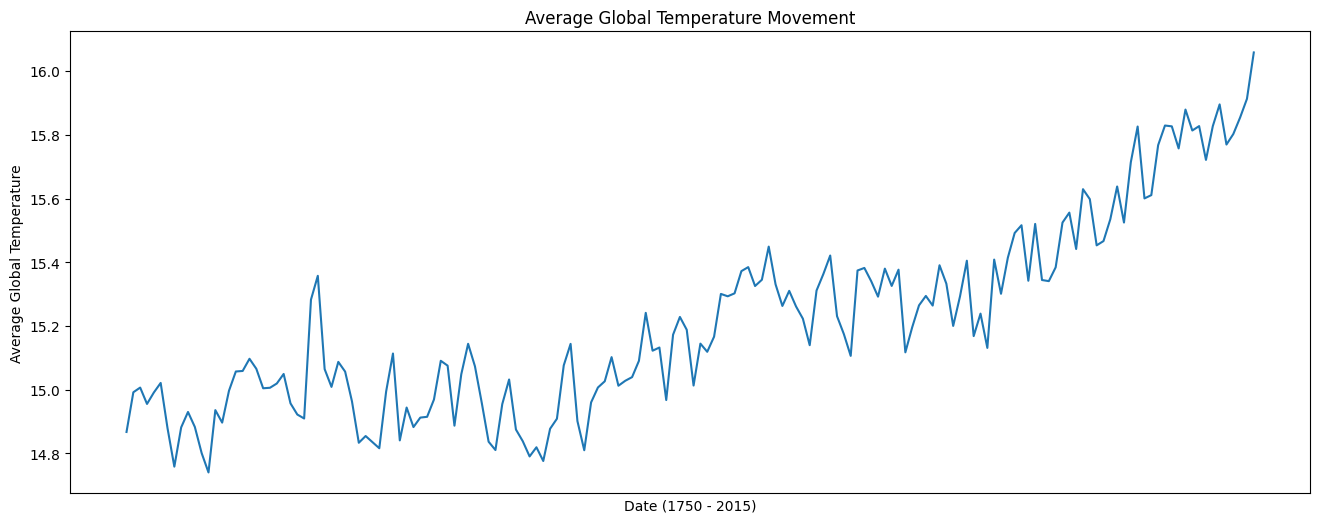

In [ ]:
global_temp = global_temp[['dt', 'LandAndOceanAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt'] = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt'] = global_temp['dt'].apply(lambda x:x[6:])
global_temp = global_temp.groupby(['dt'])['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = global_temp['dt'],
    y = global_temp['LandAndOceanAverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### The above visualisation shows a clear upward trend in the average global temperature over the past years

Please be mindful that the data in the early years (1750) is likely to be a little less accurate due to the limits of the record keeping at the time

### Now I'll use machine learning to predict the future average global temperature

In [ ]:
global_temp

,dt,LandAndOceanAverageTemperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000
...,...,...
161,2011,15.769500
162,2012,15.802333
163,2013,15.854417
164,2014,15.913000


In [ ]:
# Preparing the data for machine learning
X = global_temp.iloc[:, global_temp.columns != 'LandAndOceanAverageTemperature'].values
y = global_temp.iloc[:, global_temp.columns == 'LandAndOceanAverageTemperature'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([['1957'],
       ['1874'],
       ['2000'],
       ['2001'],
       ['1869'],
       ['1979'],
       ['1921'],
       ['1987'],
       ['1866'],
       ['1969'],
       ['1963'],
       ['1890'],
       ['1930'],
       ['1872'],
       ['2007'],
       ['1998'],
       ['1971'],
       ['1933'],
       ['1958'],
       ['1877'],
       ['1944'],
       ['1981'],
       ['1942'],
       ['1913'],
       ['1962'],
       ['1868'],
       ['1924'],
       ['1916'],
       ['1880'],
       ['1961'],
       ['1912'],
       ['1852'],
       ['1909'],
       ['1940'],
       ['1960'],
       ['1893'],
       ['1860'],
       ['1939'],
       ['2010'],
       ['1954'],
       ['1947'],
       ['1936'],
       ['1983'],
       ['2009'],
       ['1900'],
       ['1959'],
       ['1968'],
       ['1914'],
       ['1995'],
       ['2014'],
       ['1919'],
       ['1899'],
       ['1898'],
       ['1935'],
       ['1863'],
       ['1988'],
       ['1873'],
       ['1973'],
       ['1870'

In [ ]:
# Fitting a linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [ ]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

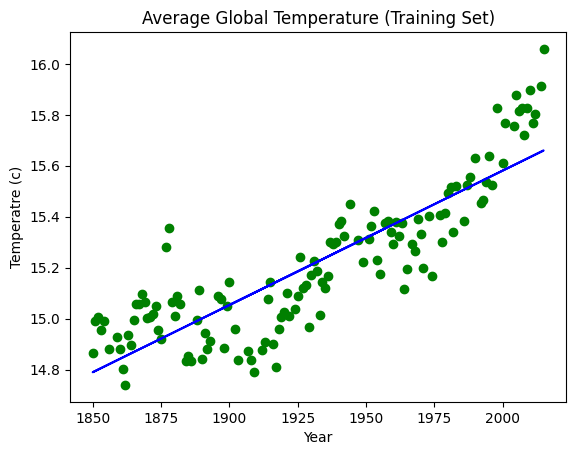

In [ ]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

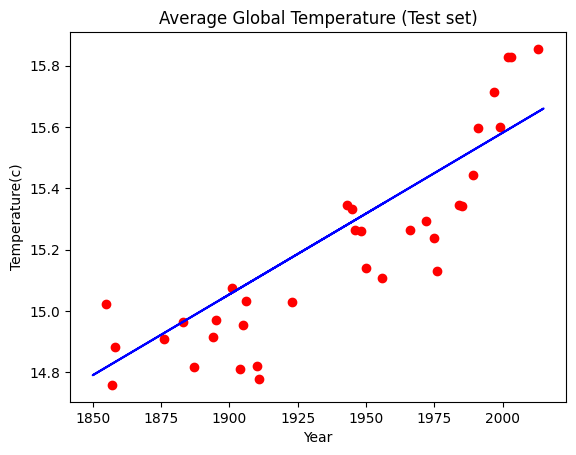

In [ ]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [ ]:
# Building the predictor
X_predict = [2025] # Enter the year that you require the temperature for
X_predict = np.array(X_predict).reshape(1, -1)#
y_predict = regressor.predict(X_predict)

# Outputting the predicted temperature of the year above
y_predict

array([[15.71278691]])

The average global temperature is likely to increase to 15.71 degrees celcius by 2025.